Importing Libraries 📚

In [221]:
# Importing libraries that will be used in this Notebook.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')

Data Collection & Processing

In [222]:
# Loading the csv data to a Pandas Dataframe
gold_data = pd.read_csv("gold_price_dataset.csv")

In [223]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [224]:
# first 5 rows of the dataframe
gold_data.head() 

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [225]:
# number of rows(2290) and columns(6)
gold_data.shape 

(2290, 6)

In [226]:
# the label of each column in the DataFrame
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [227]:
# getting some informations about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


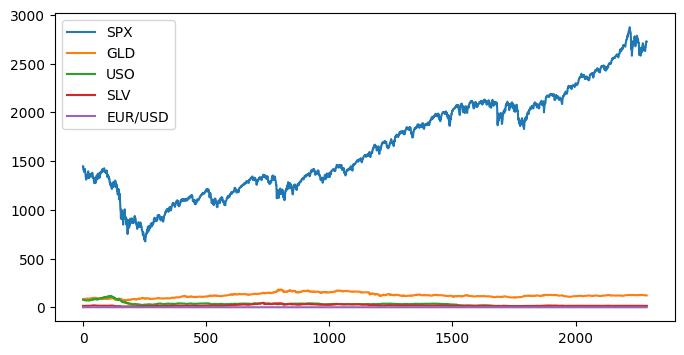

In [228]:
plt.rcParams['figure.figsize'] = [8, 4]

gold_data.plot()
plt.show()

In [229]:
# Check for null values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [230]:
#Detect missing values
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [231]:
# statistical Measures of the dataset 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**we will not use the colum of date becouse our data does not depend on it.
so we will deal with the other missing values.**

In [232]:
# drop the "date"
data = gold_data.drop(['Date'], axis=1)

In [233]:
#To check for duplicates
data.duplicated().sum()

0

In [234]:
# Check for null values
data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

**visualization**

In [235]:
q = data["USO"].quantile(0.98)
data[data["USO"] > q]
data = data[(data["USO"] < q)]

**Correlation**

In [236]:
# Compute correlation of columns 
correlation = data.corr()

<Axes: >

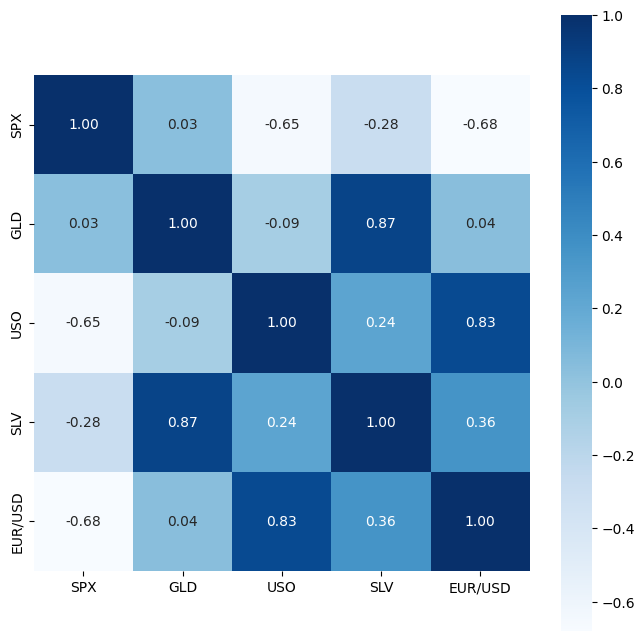

In [237]:
# Construct a heatmap to undestand the correlation
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Blues')

In [238]:
# correlation values of Gold
print(correlation['GLD'])

SPX        0.032141
GLD        1.000000
USO       -0.091204
SLV        0.874769
EUR/USD    0.040271
Name: GLD, dtype: float64


Splitting the data into a Training dataset & Testing dataset

In [239]:
# discard the gold and use the rest values as features
X = data.drop(['GLD'], axis=1)

# use the gold as the target
Y = data['GLD']

In [240]:
# Split arrays or matrices into random train and test subsets
#random_state #Testing the model with 20% of the dataset & training it with 80% of the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)


**Model Training: Random Forest Regressor**

In [241]:
regressor = RandomForestRegressor(n_estimators=200)

In [242]:
regressor

RandomForestRegressor(n_estimators=200)

In [243]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200)

**Model Training: XGBoost Regressor**

In [247]:
xgb_regressor = XGBRegressor(learning_rate=0.5, max_depth=3, n_estimators=200)

In [248]:
xgb_regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [249]:
xgb_regressor.score(X_test, Y_test)

0.9832901049241101

**Model Selection**

In [252]:
# Evaluating R2 Scores of all models
print("Random Forest Regressor: ", regressor.score(X_test, Y_test))
print("XGBoost Regressor: ", xgb_regressor.score(X_test, Y_test))

Random Forest Regressor:  0.9877734318577004
XGBoost Regressor:  0.9832901049241101


**Compare the Actual Values and Predicted Values in a Plot**

In [253]:
Y_test = np.array(Y_test)

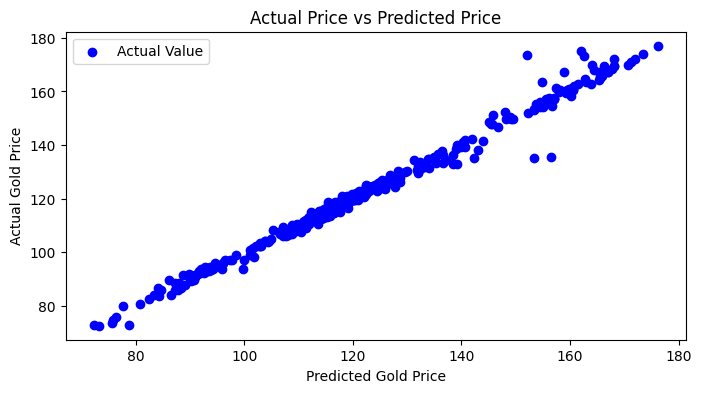

In [254]:
plt.scatter(test_data_prediction, Y_test, color='blue', label='Actual Value')
# plt.plot(test_data_prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Predicted Gold Price')
plt.ylabel('Actual Gold Price')
plt.legend()
plt.show()